## HSL and HSV

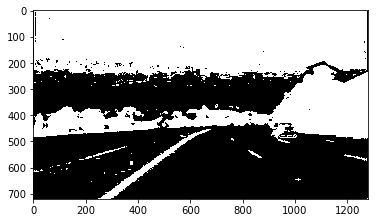

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = cv2.imread("curved-lane.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

thresh_S = (100, 255)
thresh_H = (0, 50)
binary = np.zeros_like(S)
binary[(S > thresh_S[0]) & (S <= thresh_S[1]) | ((H > thresh_H[0]) & (H <= thresh_H[1]))] = 1

plt.imshow(binary, cmap="gray")
plt.show()

## Gradients Definition

In [94]:
def abs_sobel_thresh(img, orient='x',sobel_kernel= 3, thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    binary_output = sbinary
    return binary_output

def SobelMag(img, sobel_kernel= 3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    ##binary_output = gradmag
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return (binary_output)

def SobelDir(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.arctan2(np.sqrt(sobely**2), np.sqrt(sobelx**2))
    
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= thresh[0]) & (gradmag <= thresh[1])] = 1
    return binary_output

## Gradient and Channel 

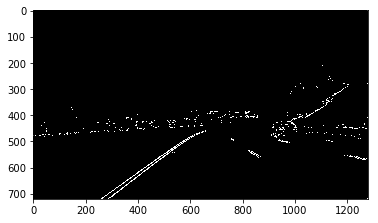

In [95]:
mag_threshMag = (30,160)
mag_threshDir = (0.6, 1.45)
thresh_x = (50,100)
thresh_y = (50,100)
kernel_size = 3
sobelMag = SobelMag(img, kernel_size, mag_threshMag)
sobelDir = SobelDir(img, kernel_size, mag_threshDir)
gradx = abs_sobel_thresh(img, 'x', kernel_size, thresh_x)
grady = abs_sobel_thresh(img, 'y', kernel_size, thresh_y)
combined = np.zeros_like(sobelMag)
combined[(((gradx == 1) & (grady == 1)) | ((sobelMag == 1) & (sobelDir == 1))) & (binary == 1)] = 1

plt.imshow(combined, cmap='gray')
plt.show()